In [1]:
# Regularized Portfolio Optimization
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file = np.loadtxt(open("XReturns.csv"), delimiter=",")
X = file

# X is a 200x48 matrix, 200 time steps and 48 assets
# we will select the optimal wight of each asset to minimize the Risk (volatility) of the Portfolio

200


In [16]:
# First 120 steps will be use for training and the rest (80) for testing
XTrain = X[0:120,:]
XTest = X[120:200,:]

XTrain = XTrain.transpose()
XTest = XTest.transpose()

# Clculating Covariance matrices
# [we get 48x48 matrices, each value represents the covariance of one asset against one other]
Cov_Train = np.cov(XTrain)
Cov_Test = np.cov(XTest)

p = 48
vol_Test = np.zeros((1000,1))
lambdas = np.zeros((1000,1))
cont = 0

for i in np.arange(0,10,.01):
    inv_Cov_Train = np.linalg.inv(Cov_Train+i*np.identity(p)) # Recuerda que i es lambda
    z = np.sum(inv_Cov_Train)
    w = np.sum(inv_Cov_Train,axis=1)/z
    vol_Test[cont] = w.transpose().dot(Cov_Test).dot(w)
    lambdas[cont] = i # Solamente acumula los lambdas
    cont = cont+1   

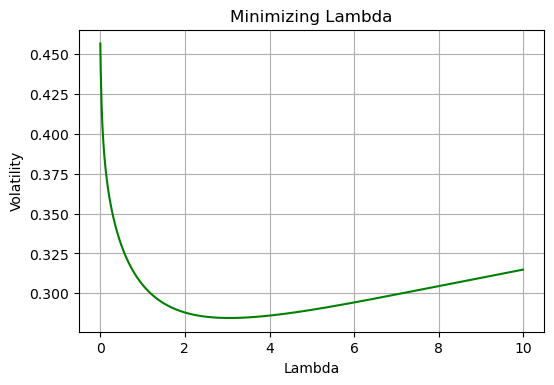

In [32]:
plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.title('Minimizing Lambda')
plt.plot(lambdas,vol_Test,'g' )
plt.xlabel('Lambda')
plt.ylabel('Volatility')
plt.grid()
plt.show()

In [30]:
# Computing the value of lambda that minimizes volatility, from graph we can see is around 3
min_vol = np.where(vol_Test == min(vol_Test))
lambda_min = lambdas[min_vol]

# Computing weights of 48 assets with minimizing lambda
inv_Cov_Train = np.linalg.inv(Cov_Train+lambda_min*np.identity(p))
z = np.sum(inv_Cov_Train)
w = np.sum(inv_Cov_Train,axis=1)/z

# Weight of every asset, remember that negative weights means shorting
print("Asset        Weight")
for i in range(48):
    print(" ",i+1,"  ",w[i])


Asset        Weight
  1    0.08560365061709004
  2    0.08331023240359364
  3    0.031796112328329205
  4    0.07296784046159457
  5    0.03205825783721221
  6    -0.03597741154015003
  7    0.021044899510456554
  8    0.035785571690846604
  9    0.0331428467714681
  10    0.03735531674851317
  11    -0.05941369177466519
  12    0.013921378427290526
  13    0.04738029238266714
  14    -0.0017349643943913922
  15    0.12866887160981372
  16    0.07888605844652258
  17    -0.008661595241488136
  18    -0.07232286631003469
  19    0.02581595941345284
  20    0.0526897008068009
  21    -0.0015984373044144937
  22    0.013275408250489352
  23    -0.013558299496167605
  24    0.003933000430081748
  25    0.018738001656508768
  26    -0.00767061714154138
  27    -0.047417476971620375
  28    -0.03568406797529227
  29    0.015067902204976143
  30    0.008665114568755952
  31    0.1225823126535635
  32    0.0506742067357646
  33    0.0879152591177243
  34    0.01923453638547372
  35    -0.01981